In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats
import re
import sys 

import cptac
import cptac.utils as u

In [2]:
c1 = cptac.Endometrial()
c2 = cptac.Colon()

In [3]:
cancer1 = "Endometrial"
cancer2 = "Colon"
gene = 'KRAS'

In [4]:
# Step 1 - Create dataframe in order to do comparisons with wrap_ttest
prot = c1.get_proteomics()
prot_list = list(prot.columns)
prot_and_mutations = c1.join_omics_to_mutations(
    mutations_genes = [gene], omics_df_name = 'proteomics', omics_genes = prot_list)  

# Step 2 - Create binary column 
prot_and_mutations['binary_mutations'] = np.where(
            prot_and_mutations[gene+'_Mutation_Status'] == 'Wildtype_Tumor', 'Wildtype', 'Mutated')

# Step 3 - Format the dataframe correctly for the T-test(just omics and binary columns for tumors)
tumors = prot_and_mutations[prot_and_mutations.Sample_Status == 'Tumor'] #drop Normal samples
columns_to_drop = [gene+"_Mutation", gene+"_Location", gene+"_Mutation_Status", "Sample_Status"]
mut_status = tumors.drop(columns_to_drop, axis = 1)
mut_status = mut_status.dropna(axis=1,how='all')

In [5]:
col_list = list(mut_status.columns)
col_list.remove('binary_mutations')

print("Doing t-test comparisons for", cancer1)

# Call wrap_ttest, pass in formatted dataframe
wrap_results = u.wrap_ttest(mut_status, 'binary_mutations', col_list, return_all=True)

Doing t-test comparisons for Endometrial


C:\Users\brittany henderson\Anaconda3\envs\Research\lib\site-packages\numpy\core\fromnumeric.py:3367: RuntimeWarning: Degrees of freedom <= 0 for slice
  **kwargs)
C:\Users\brittany henderson\Anaconda3\envs\Research\lib\site-packages\numpy\core\_methods.py:132: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\brittany henderson\Anaconda3\envs\Research\lib\site-packages\scipy\stats\_distn_infrastructure.py:877: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\Users\brittany henderson\Anaconda3\envs\Research\lib\site-packages\scipy\stats\_distn_infrastructure.py:877: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\Users\brittany henderson\Anaconda3\envs\Research\lib\site-packages\scipy\stats\_distn_infrastructure.py:1831: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


1 significant comparisons!


In [6]:
print(wrap_results.loc[wrap_results['Comparison'] == gene+"_proteomics"])
wrap_results

           Comparison   P_Value
4488  KRAS_proteomics  0.007068


,Comparison,P_Value
0,SPRY1_proteomics,7.362178e-08
1,CDC42SE2_proteomics,3.304697e-05
2,CX3CL1_proteomics,1.357438e-03
3,AGR2_proteomics,1.528983e-03
4,DTX2_proteomics,1.828525e-03
...,...,...
10988,RMND5A_proteomics,9.986396e-01
10989,PSMD8_proteomics,9.989207e-01
10990,RETREG3_proteomics,9.993518e-01
10991,PRPS1L1_proteomics,9.995086e-01


In [7]:
# endo ttest
# Step 1 - Create dataframe in order to do comparisons with wrap_ttest
prot2 = c2.get_proteomics()
prot_list2 = list(prot2.columns)
prot_and_mutations = c2.join_omics_to_mutations(
    mutations_genes = [gene], omics_df_name = 'proteomics', omics_genes = prot_list2)  

# Step 2 - Create binary column 
prot_and_mutations['binary_mutations'] = np.where(
            prot_and_mutations[gene+'_Mutation_Status'] == 'Wildtype_Tumor', 'Wildtype', 'Mutated')

# Step 3 - Format the dataframe correctly for the T-test(just omics and binary columns for tumors)
tumors = prot_and_mutations[prot_and_mutations.Sample_Status == 'Tumor'] #drop Normal samples
columns_to_drop = [gene+"_Mutation", gene+"_Location", gene+"_Mutation_Status", "Sample_Status"]
mut_status = tumors.drop(columns_to_drop, axis = 1)
mut_status2 = mut_status.dropna(axis=1,how='all')

In [8]:
col_list2 = list(mut_status2.columns)
col_list2.remove('binary_mutations')

print("Doing t-test comparisons for", cancer2)

# Call wrap_ttest, pass in formatted dataframe
wrap_results2 = u.wrap_ttest(mut_status2, 'binary_mutations', col_list2, return_all=True)

Doing t-test comparisons for Colon
No significant comparisons.


In [9]:
print(wrap_results2.loc[wrap_results2['Comparison'] == gene+"_proteomics"])
wrap_results2

           Comparison   P_Value
3339  KRAS_proteomics  0.039128


,Comparison,P_Value
0,IL33_proteomics,0.000379
1,CACYBP_proteomics,0.003278
2,C15orf40_proteomics,0.004509
3,AAMP_proteomics,0.004913
4,ATP6V1C1_proteomics,0.006031
...,...,...
8062,RUFY3_proteomics,0.983356
8063,UBIAD1_proteomics,0.986139
8064,MAT2A_proteomics,0.991577
8065,MICAL1_proteomics,0.996492


In [10]:
#combine pval results
combined = wrap_results.merge(wrap_results2, on='Comparison')
combined = combined.replace(regex=True,to_replace='_proteomics', value='')

In [11]:
# Green = interacting protein
interacting_list = u.get_interacting_proteins(gene)
combined["color"] = np.where(combined["Comparison"].isin(interacting_list), "green", "black")
print(interacting_list)
#combined.loc[combined['color'] == 'green']

['RAF1', 'MAPK1', 'KRAS', 'MAP2K2', 'MAPK3', 'PIK3CA', 'EGF', 'ERBB3', 'ERBB2', 'EGFR', 'BRAF', 'PIK3CB', 'ARAF', 'MAP2K1', 'PTPN11', 'RET', 'NF1', 'PIK3CG', 'NRAS', 'RALGDS', 'SRC', 'GRB2', 'SOS1', 'HRAS', 'CDKN2A', 'PRRT2', 'RAP1GDS1', 'HNRNPC', 'RASSF2', 'RASSF5', 'CALM1']


In [12]:
limit_x = combined.loc[combined['P_Value_x'] <= .05]
limit_y = combined.loc[combined['P_Value_y'] <= .05]
limit_both = limit_x.loc[limit_x['P_Value_y'] <= .05]
print(limit_both.loc[limit_both['color'] == 'green'])
limit_both

     Comparison  P_Value_x  P_Value_y  color
3125       KRAS   0.007068   0.039128  green


,Comparison,P_Value_x,P_Value_y,color
20,ABCC3,0.009997,0.044134,black
21,AQR,0.010353,0.016029,black
62,CEACAM7,0.043931,0.040135,black
1537,COLGALT1,0.025420,0.031681,black
1687,DESI2,0.000678,0.046654,black
1776,EML2,0.015097,0.011955,black
1778,EHHADH,0.017653,0.016710,black
1783,EXOSC9,0.023719,0.012235,black
1793,EXOSC3,0.041556,0.029112,black
2161,ETHE1,0.019068,0.039923,black


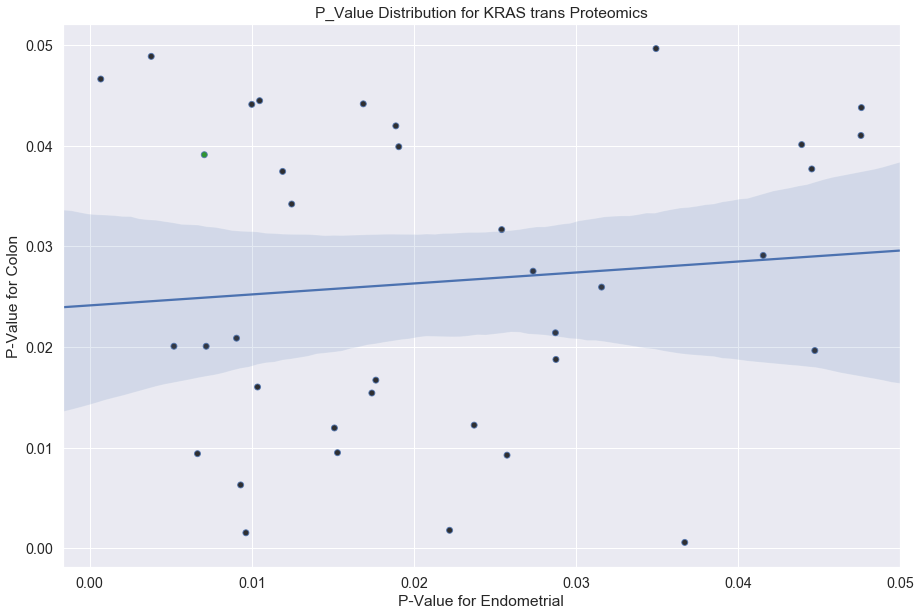

In [13]:
# Format figure size and font
plt.rcParams['figure.figsize']=(15,10)
sns.set(font_scale = 1.3)

# Format title and axis
plot = sns.regplot(x="P_Value_x", y="P_Value_y", data=limit_both, scatter_kws={'facecolors':limit_both['color']})
plot.set_title("P_Value Distribution for "+gene+" trans Proteomics")
plot.set(xlabel = 'P-Value for '+cancer1)
plot.set(ylabel = 'P-Value for '+cancer2)

plt.show()
plt.clf()
plt.close()

KRAS: 1 significant result for endometrial. No significant results for colon. 1 interacting protein  (KRAS itself) in graph with alpha = 0.05 borders.